In [2]:
## Pandas dan Numpy
import pandas as pd
import numpy as np

# Visualization Library
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as st
from scipy.stats import chi2_contingency

# Problem Statement
Your client is a Portuguese consumer bank which recently ran a direct marketing campaign by direct phone calls. Bank customers were offered a term deposit. The result-- whether customer opened a term deposit or not -- were recorded. Data was gathered from May 2008 to November 2010. The bank wants to build an automated system to predict whether a new customer would open a term deposit or not, so it can perform better targeted marketing. The Chief Technology Architect of our company requested using Neural Network classifier.

Data source: https://archive.ics.uci.edu/ml/datasets/bank+marketing

Citation Request:

This dataset is public available for research. The details are described in S. Moro, P. Cortez and P. Rita. "A Data-Driven Approach to Predict the Success of Bank Telemarketing." Decision Support Systems, Elsevier, 62:22-31, June 2014

# Goal and Objectives

Goal:
Predict if the client will subscribe a term deposit.

Objectives:
- Perform Exploratory Data Analysis
- Data prereparation
- Modelling
- Evaluation
- Give machine learning recommendation and business recommendation

# Exploratory Data Analysis

In [3]:
bank = pd.read_csv('bank-full.csv', engine='python', sep=None)

In [4]:
bank.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [5]:
info = bank.info()
describe = bank.describe()
null = bank.isnull().sum()

print(info)
print("\n\033[1mDescriptive Statistics:\033[0m")
print(describe)
print("\n\033[1mNull Values:\033[0m")
print(null)
print("\n\033[1mUnique Values:\033[0m")
for col in bank.columns:
  print(f"Unique values of '{col}': {bank[col].unique()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None

Descriptive Statistics:
                age        balance           day      duration      c

In [6]:
# divide numerical & categorical data
numerical = bank.select_dtypes(exclude='object')
categorical = bank.select_dtypes(include='object')
num = numerical.columns
cat = categorical.columns

In [7]:
print("Mode:")
print(numerical.mode(axis=0))

Mode:
   age  balance  day  duration  campaign  pdays  previous
0   32        0   20       124         1     -1         0


Attributes:

age : customer age (numeric)

job : type of job (Categorical)

marital : marital status (Categorical)

education : level of education (Categorical)

default: has unpaid credit (Categorical)

balance: average yearly balance, in euros (numeric)

housing: has housing loan (Categorical)

loan: has personal loan (Categorical)

contact: how the bank contact the customer (Categorical)

day: last contact day (categorical)

month: last contact month (Categorical)

duration: last contact duration, in seconds (numeric)

campaign: number of contacts performed during this campaign and for this client (numeric)

pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric); -1 means client was not previously contacted

previous: number of contacts performed before this campaign and for this client (numeric)

poutcome: outcome of the previous marketing campaign (categorical)

y: has the client subscribed a term deposit? (binary: 'yes','no')

## Univariate Analysis

### Distribution of numerical features

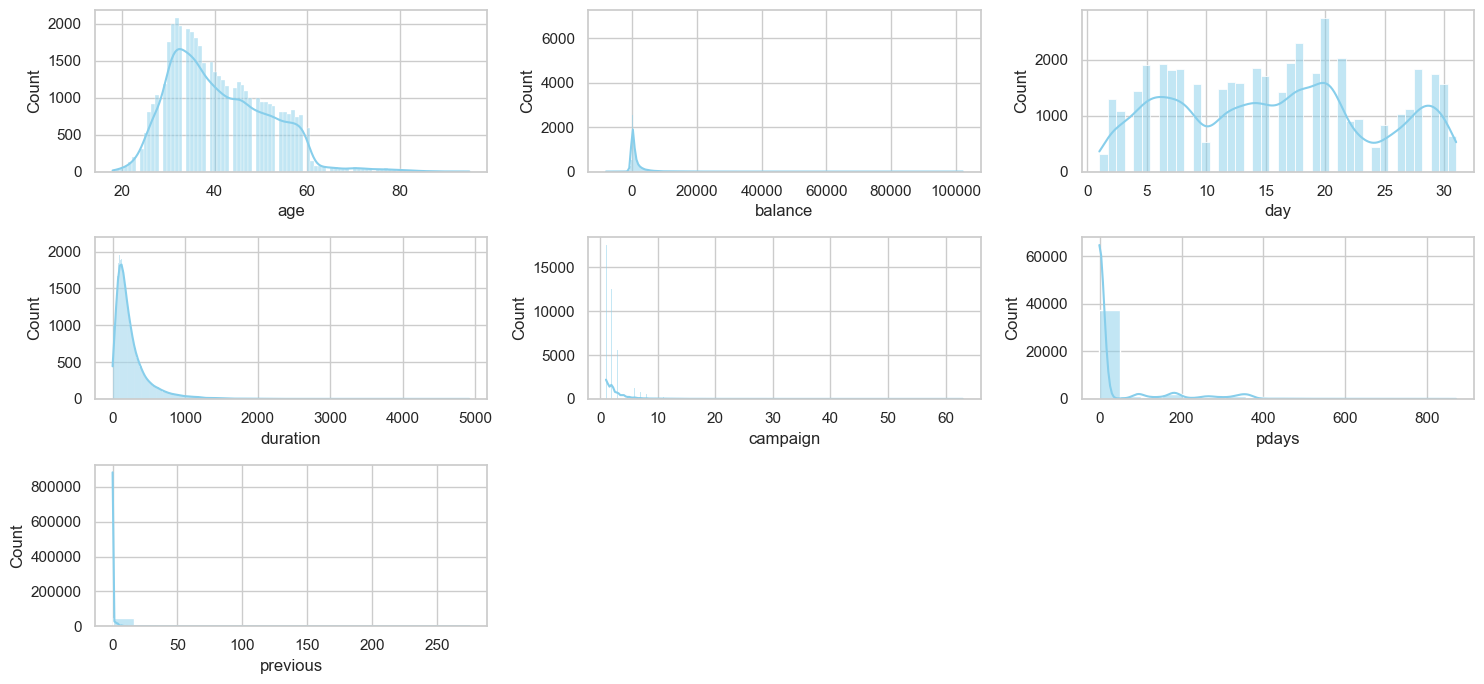

In [8]:
plt.figure(figsize=(15,7))
sns.set(style="whitegrid")
for i in range(0, len(num)):
    plt.subplot(3, 3, i+1)
    sns.histplot(bank[num[i]], kde=True, color = "skyblue")
plt.tight_layout()

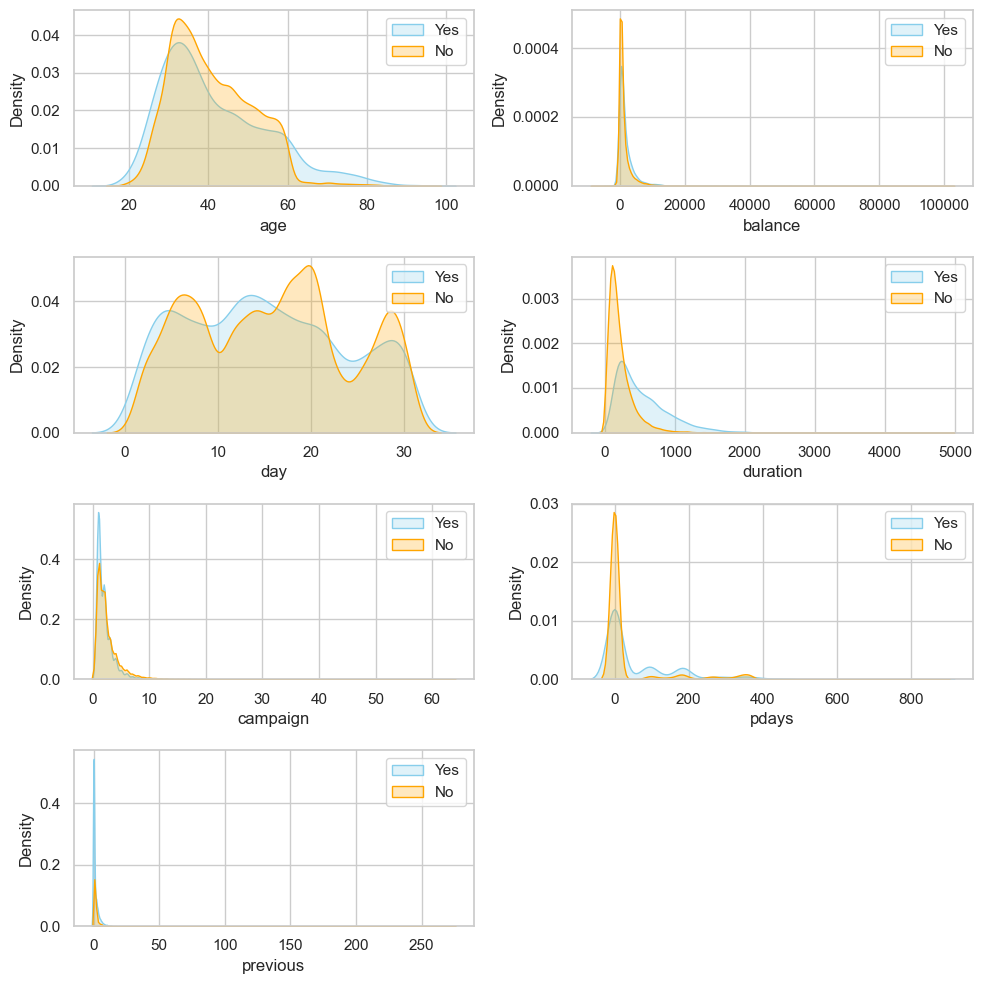

In [9]:
yes = bank[bank['y']=='yes']
no = bank[bank['y']=='no']

plt.figure(figsize=(10,10))
sns.set(style="whitegrid")
for i in range(0, len(num)):
    plt.subplot(4, 2, i+1)
    sns.kdeplot(yes[num[i]], color = "skyblue", label= 'Yes', fill=True, warn_singular=False)
    sns.kdeplot(no[num[i]], color = "orange", label= 'No', fill=True, warn_singular=False)
    plt.legend()
plt.tight_layout()

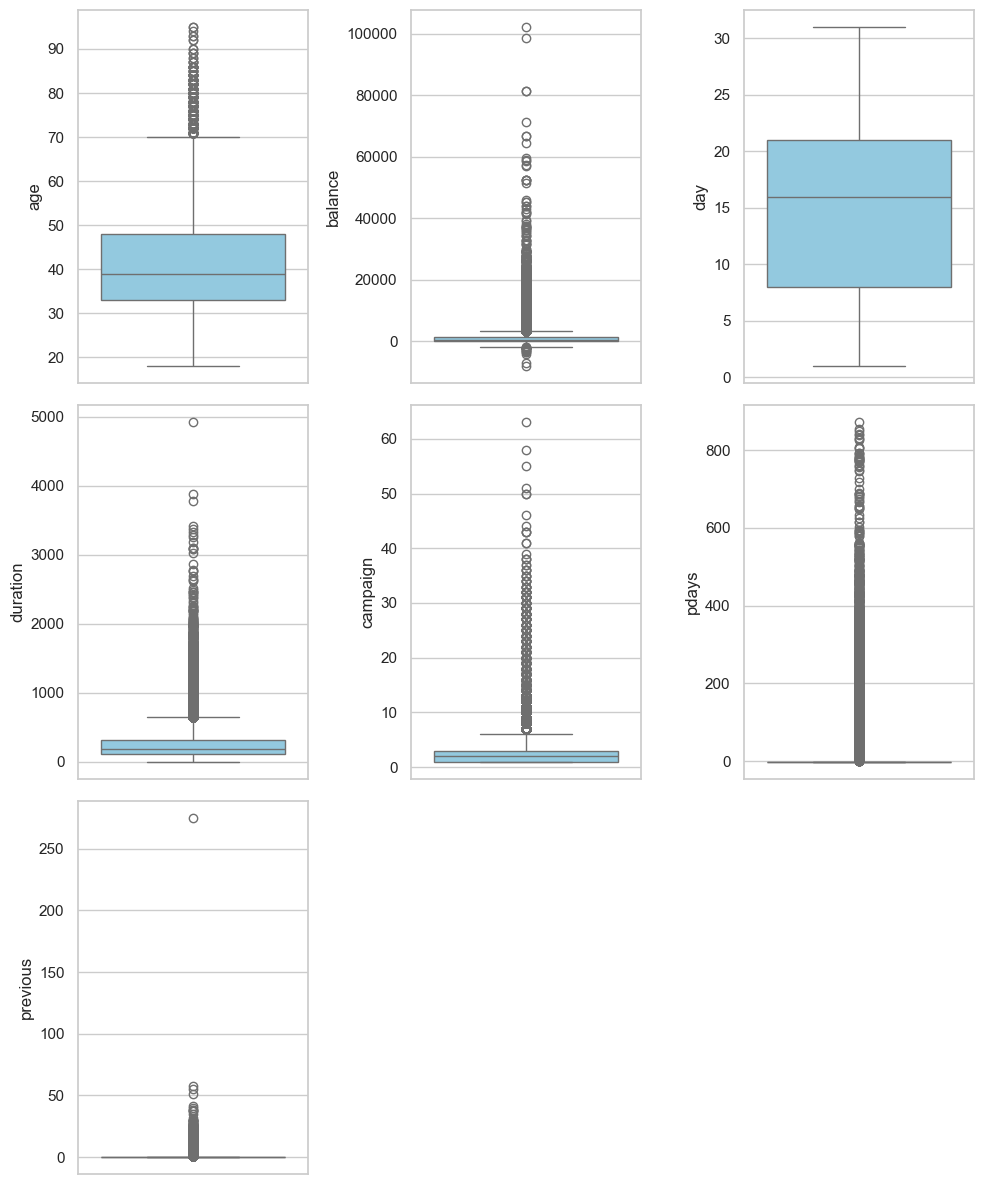

In [10]:
plt.figure(figsize=(10,12))
sns.set(style="whitegrid")
for i in range(0, len(num)):
    plt.subplot(3, 3, i+1)
    sns.boxplot(bank[num[i]], color = "skyblue")
plt.tight_layout()

- The average age of customer is 39. Customers are mostly in the 18-70 age bracket. People over 60 years old largely chose to open a deposit account.
- The average balance is 448 euros (I use median because the distribution is positively skewed). There are many outliers.
- Bank made calls evenly throughout the month. There is no difference of trend between 'yes' and 'no' visually.
- The average duration of call is 180 s or 3 minutes, and it seems that calls longer than 250 s (4 minutes) resulted in more customer opening a deposit account. There are many outliers.
- Bank typically made 2 calls.
- Most customer hasn't been contacted previously.

### Categorical features

In [11]:
# see the frequency of top value in categorical columns
freq_cat = bank[cat].describe()
print(freq_cat)

                job  marital  education default housing   loan   contact  \
count         45211    45211      45211   45211   45211  45211     45211   
unique           12        3          4       2       2      2         3   
top     blue-collar  married  secondary      no     yes     no  cellular   
freq           9732    27214      23202   44396   25130  37967     29285   

        month poutcome      y  
count   45211    45211  45211  
unique     12        4      2  
top       may  unknown     no  
freq    13766    36959  39922  


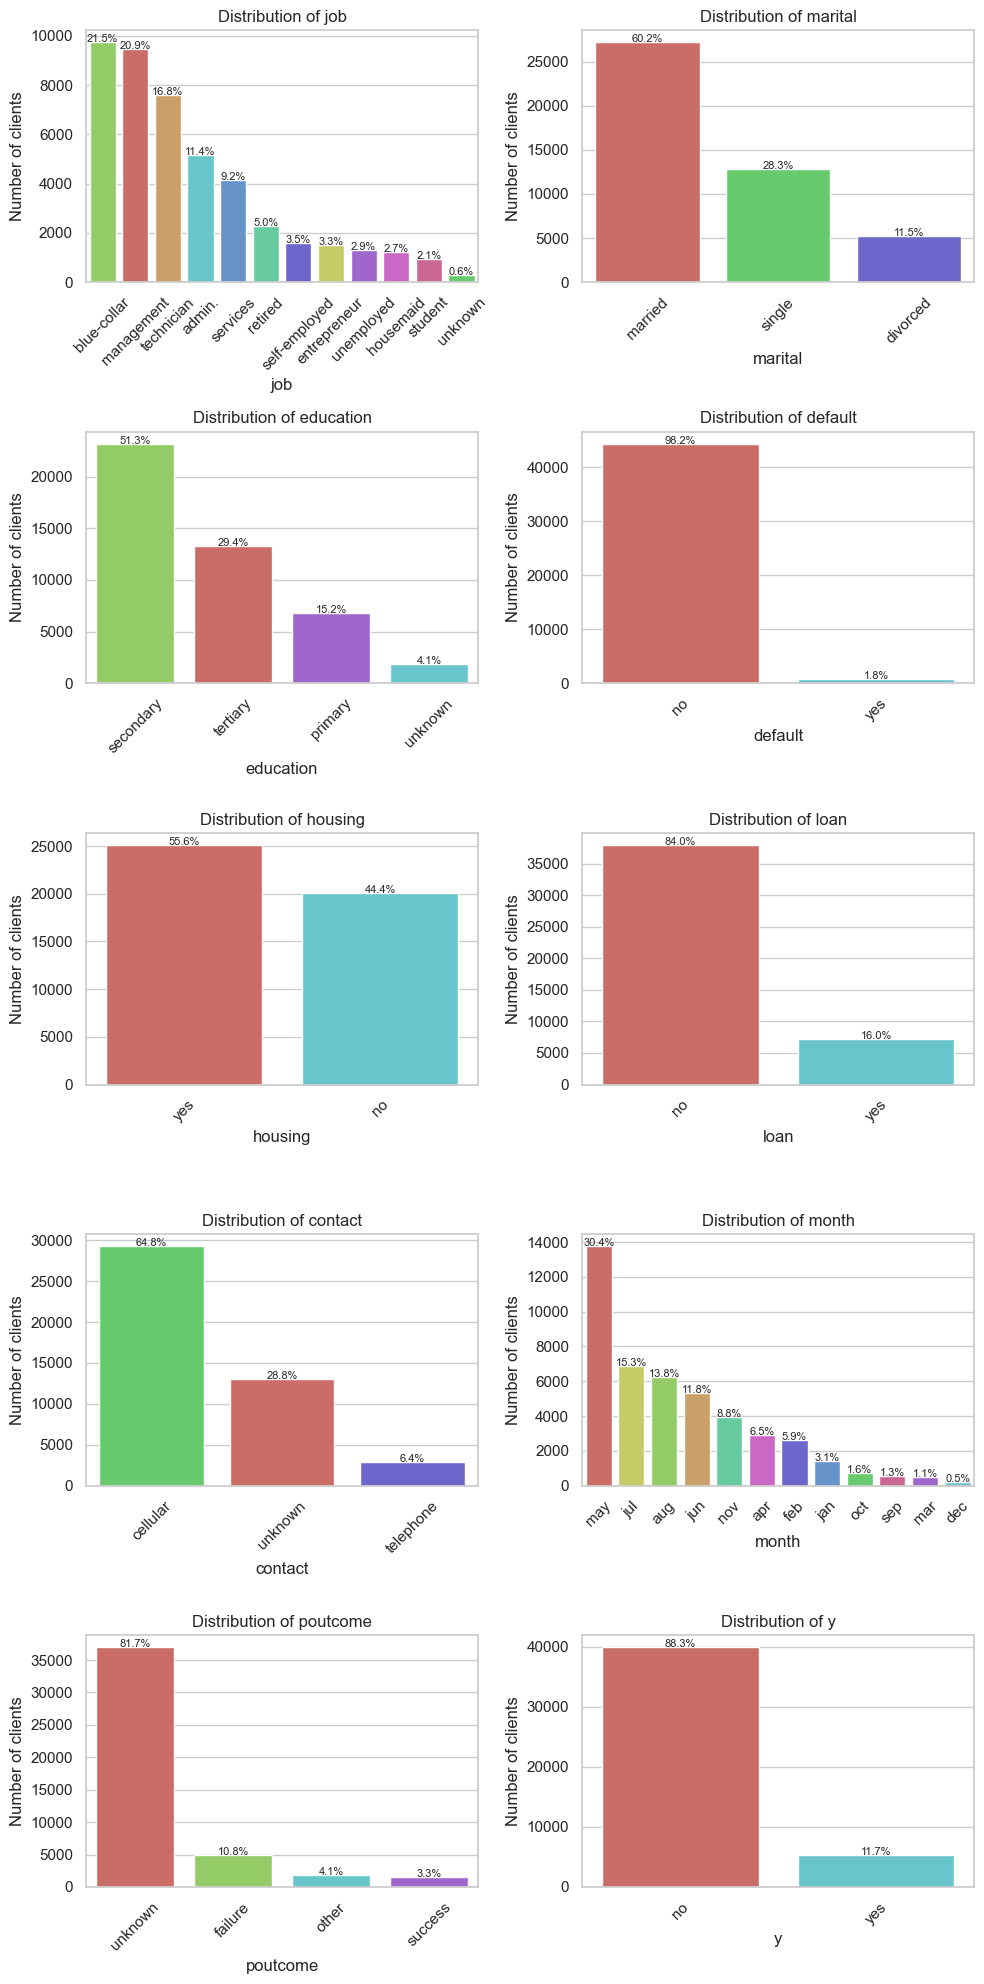

In [12]:
ax = plt.figure(figsize=(10,20))
for i, column in enumerate(cat, 1):
    plt.subplot(5, 2, i)
    sns.countplot(data=bank, x=column, order=bank[column].value_counts().index, palette='hls', hue=column)
    plt.title(f'Distribution of {column}')
    plt.ylabel('Number of clients')

    # Calculate and display percentages on top of each bar
    total = len(bank[column])
    for p in plt.gca().patches:
        height = p.get_height()
        plt.gca().text(p.get_x() + p.get_width() / 2, height + 0.1, f'{height/total:.1%}', ha='center', fontsize=8)
    
    # Rotate x-axis tick labels
    plt.xticks(rotation=45)
    
    plt.tight_layout()

- Most customers are blue-collar workers, followed by management, technician, admin, and services in order.
- 60.2% of customers are married, followed by single and divorced.
- More than a half customer completed secondary education, with 30% in tertiary level.
- Around 98% of customers do not have default credit account.
- There is not much difference between the number of customer who has housing loan and without housing loan.
- 84% of customers do not have personal loan.
- Almost 65% of calls were made through cellular.
- May recorded the highest count of calls.
- It seems that the bank didn't properly follow up its previous campaign and record the result, because almost 82% records are identified as 'unknown'.
- There are approximately 88% of customers who don't open a term deposit.

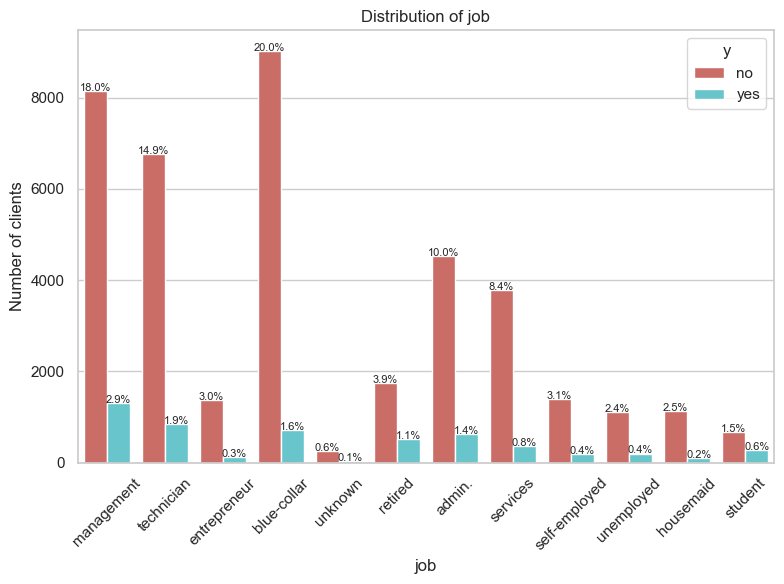

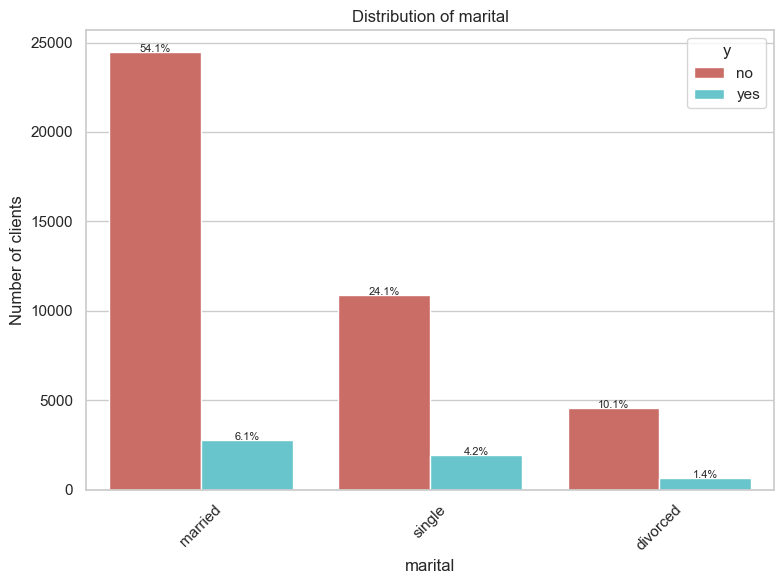

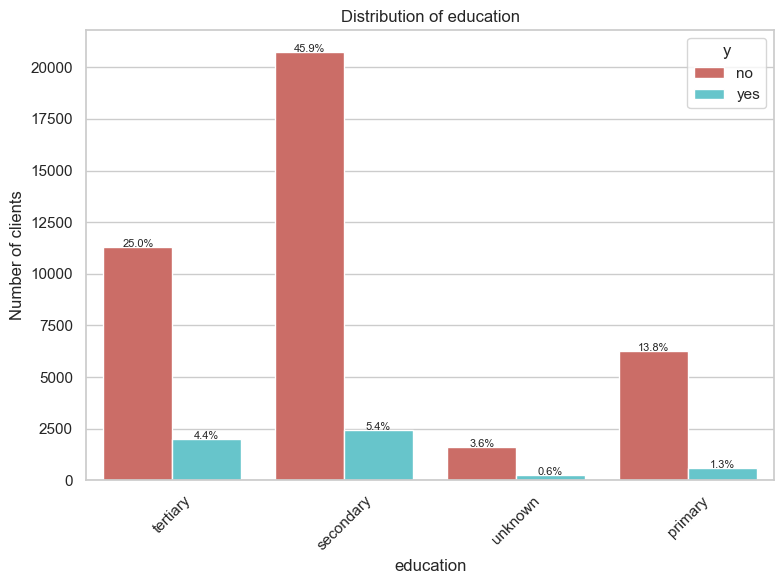

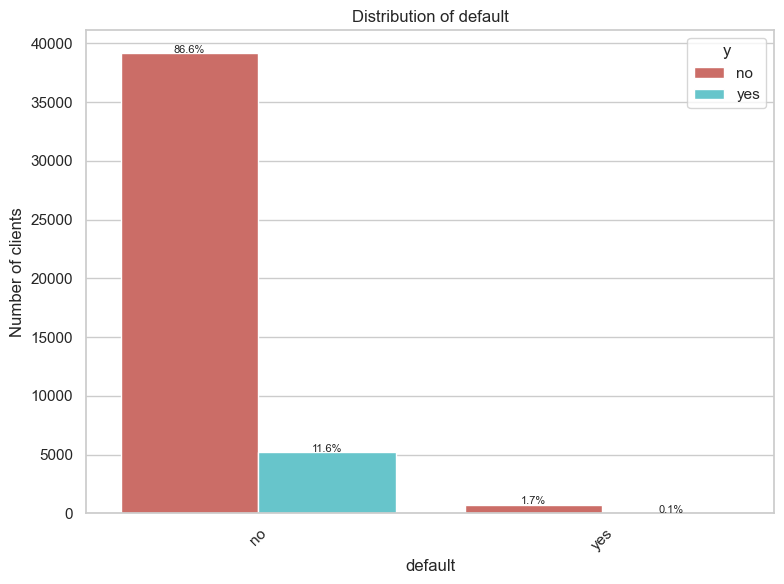

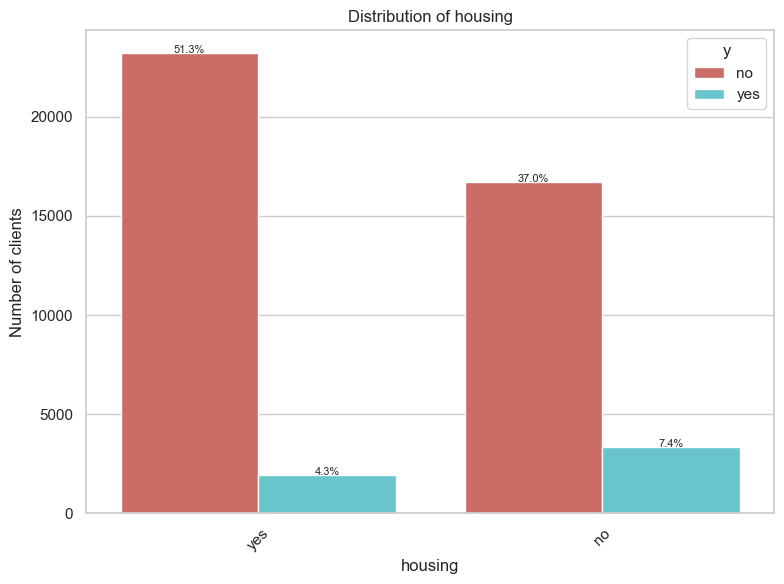

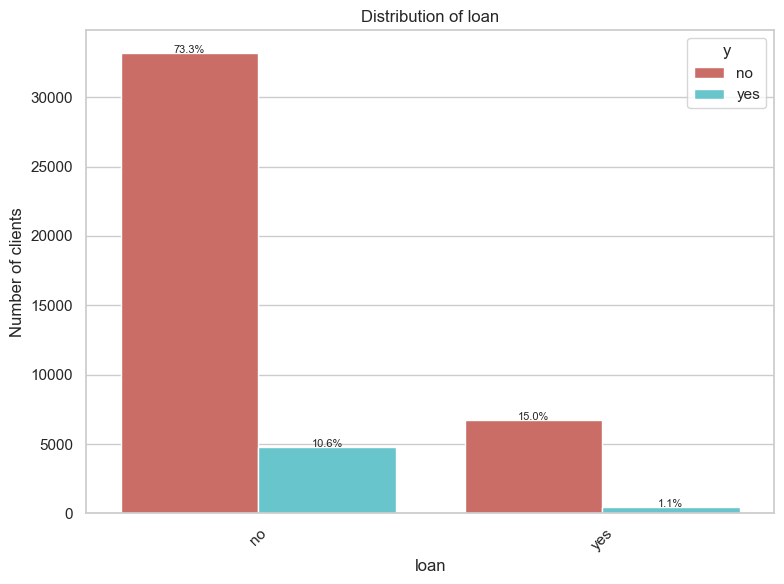

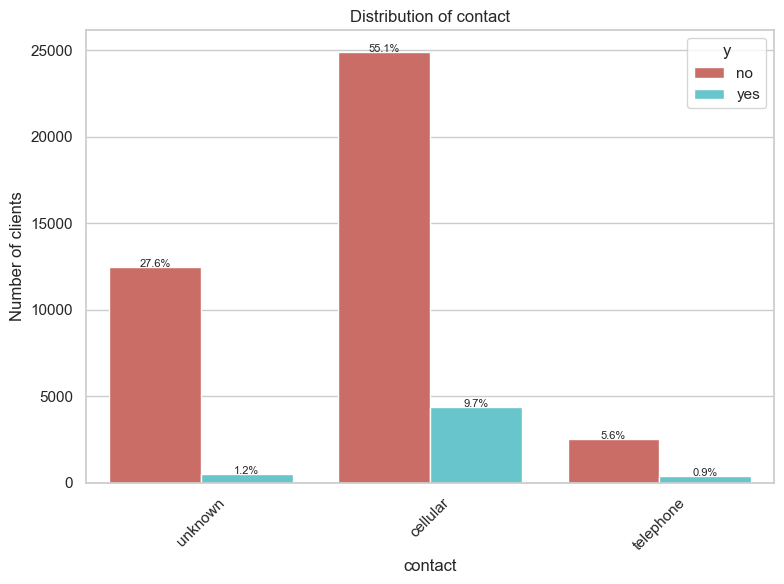

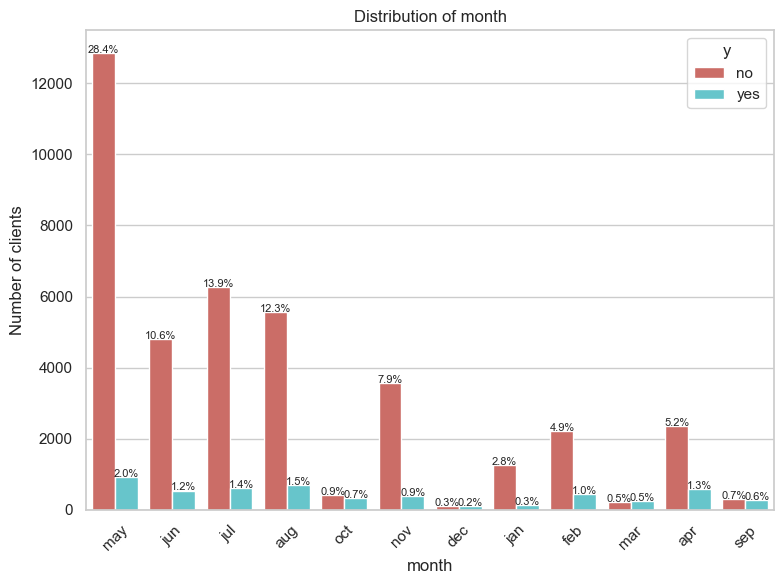

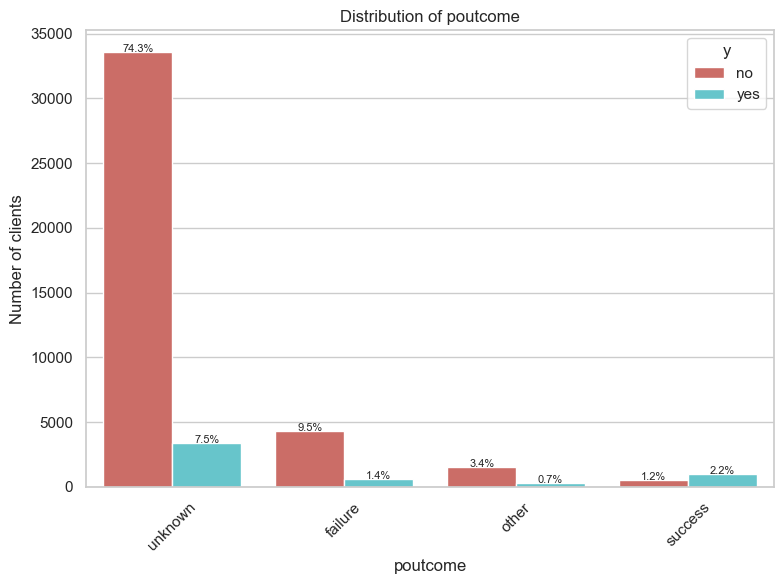

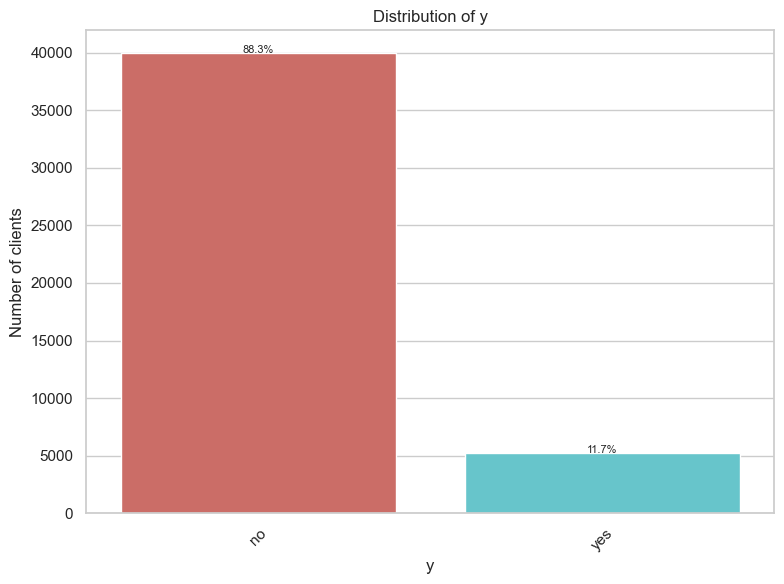

In [13]:
for column in cat:
    plt.figure(figsize=(8, 6))

    sns.countplot(data=bank, x=column, hue='y', palette='hls')
    plt.title(f'Distribution of {column}')
    plt.ylabel('Number of clients')

    # Calculate and display percentages on top of each bar
    total = len(bank[column])
    for p in plt.gca().patches:
        height = p.get_height()
        if height > 0:
            plt.gca().text(p.get_x() + p.get_width() / 2, height + 1, f'{height/total:.1%}', ha='center', fontsize=8)

    plt.xticks(rotation=45)
    plt.tight_layout()

In [22]:
joby = bank.groupby('job')['y'].value_counts().unstack().reset_index()
joby['percentage_no'] = (joby['no'] / (joby['no'] + joby['yes'])) * 100
joby['percentage_yes'] = (joby['yes'] / (joby['no'] + joby['yes'])) * 100
joby

y             job    no   yes  percentage_no  percentage_yes
0          admin.  4540   631      87.797331       12.202669
1     blue-collar  9024   708      92.725031        7.274969
2    entrepreneur  1364   123      91.728312        8.271688
3       housemaid  1131   109      91.209677        8.790323
4      management  8157  1301      86.244449       13.755551
5         retired  1748   516      77.208481       22.791519
6   self-employed  1392   187      88.157061       11.842939
7        services  3785   369      91.116996        8.883004
8         student   669   269      71.321962       28.678038
9      technician  6757   840      88.943004       11.056996
10     unemployed  1101   202      84.497314       15.502686
11        unknown   254    34      88.194444       11.805556

In [24]:
marity = bank.groupby('marital')['y'].value_counts().unstack().reset_index()
marity['percentage_no'] = (marity['no'] / (marity['no'] + marity['yes'])) * 100
marity['percentage_yes'] = (marity['yes'] / (marity['no'] + marity['yes'])) * 100
marity

y   marital     no   yes  percentage_no  percentage_yes
0  divorced   4585   622      88.054542       11.945458
1   married  24459  2755      89.876534       10.123466
2    single  10878  1912      85.050821       14.949179

In [26]:
eduy = bank.groupby('education')['y'].value_counts().unstack().reset_index()
eduy['percentage_no'] = (eduy['no'] / (eduy['no'] + eduy['yes'])) * 100
eduy['percentage_yes'] = (eduy['yes'] / (eduy['no'] + eduy['yes'])) * 100
eduy

y  education     no   yes  percentage_no  percentage_yes
0    primary   6260   591      91.373522        8.626478
1  secondary  20752  2450      89.440565       10.559435
2   tertiary  11305  1996      84.993610       15.006390
3    unknown   1605   252      86.429725       13.570275

In [27]:
monthy = bank.groupby('month')['y'].value_counts().unstack().reset_index()
monthy['percentage_no'] = (monthy['no'] / (monthy['no'] + monthy['yes'])) * 100
monthy['percentage_yes'] = (monthy['yes'] / (monthy['no'] + monthy['yes'])) * 100
monthy

y  month     no  yes  percentage_no  percentage_yes
0    apr   2355  577      80.320600       19.679400
1    aug   5559  688      88.986714       11.013286
2    dec    114  100      53.271028       46.728972
3    feb   2208  441      83.352208       16.647792
4    jan   1261  142      89.878831       10.121169
5    jul   6268  627      90.906454        9.093546
6    jun   4795  546      89.777195       10.222805
7    mar    229  248      48.008386       51.991614
8    may  12841  925      93.280546        6.719454
9    nov   3567  403      89.848866       10.151134
10   oct    415  323      56.233062       43.766938
11   sep    310  269      53.540587       46.459413

- Customers who opened deposit account mostly do not have any loan and unpaid credit.
- The highest conversion rate happened to student, followed by retired, unemployed, management and admin.
- Relatively, single customers responded better than divorced and married customers.
- Higher education seems to imply higher conversion rate.
- March has the highest conversion rate, followed by December, September, October. Further analysis needs to be carried out to determine if this is a seasonal trend.
- Most succesful conversion were contacted by cellular.
- Most customers do not have a history of previous campaign.

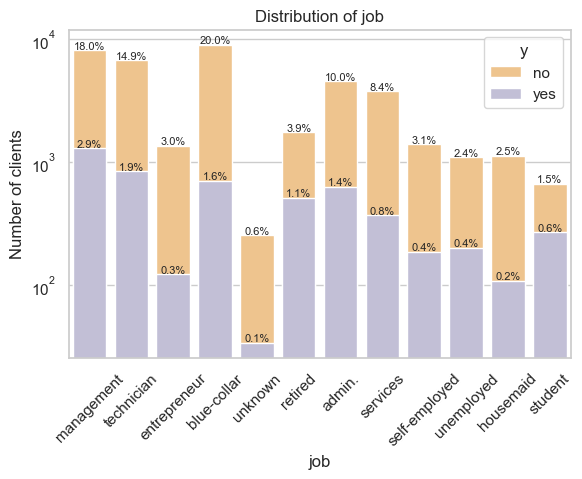

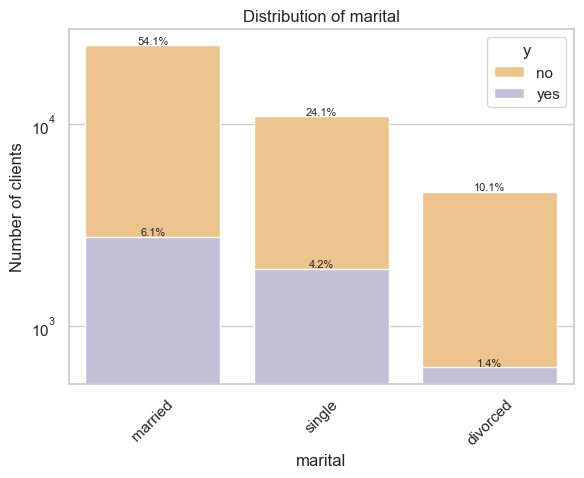

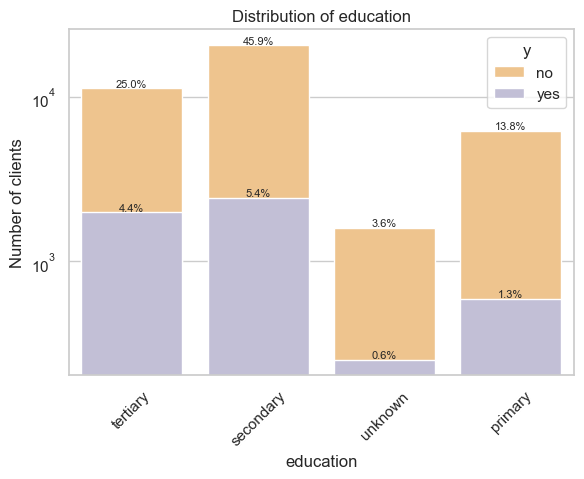

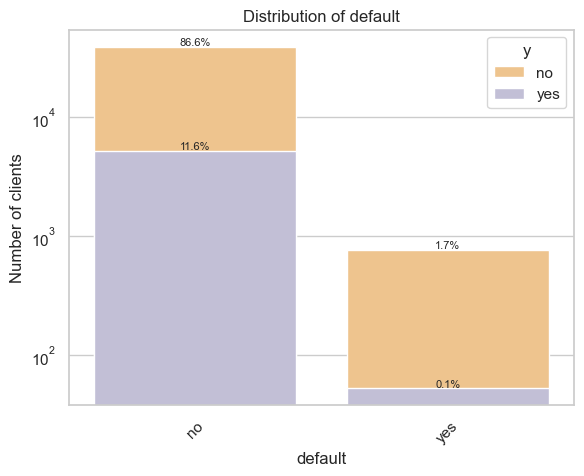

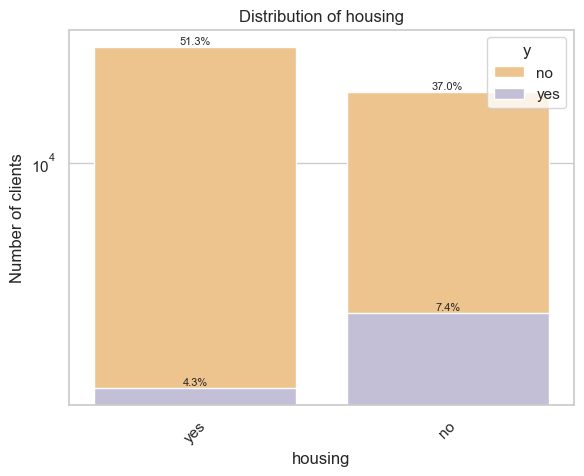

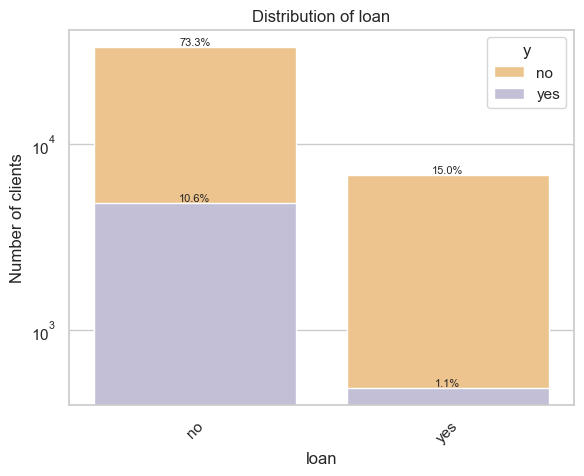

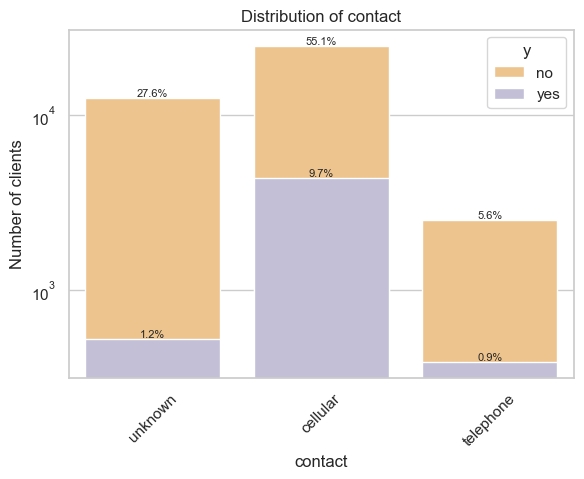

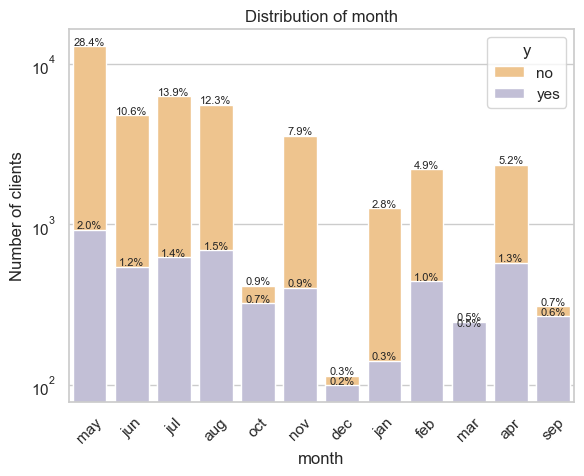

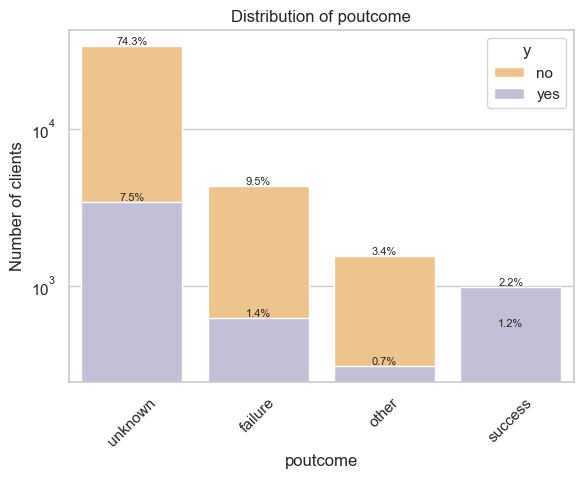

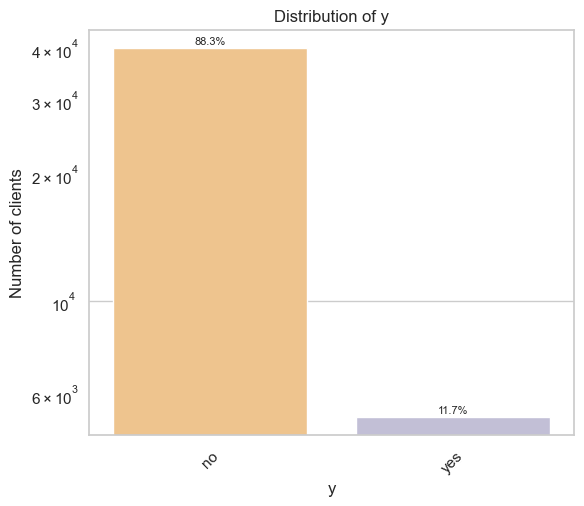

In [28]:
for i in range(0, len(cat)):
    plt.figure(figsize=(6, 45))
    plt.subplot(10, 1, i+1)
    
    ax = sns.countplot(data=bank, x=cat[i], hue="y", dodge=False, palette="PuOr")

    plt.yscale('log')

    # Calculate and display percentages on top of each bar
    for p in ax.patches:
        height = p.get_height()
        width = p.get_width()
        x = p.get_x()
        y = p.get_y()
        percentage = f'{height / total :.1%}'
        ax.annotate(percentage, (x + width / 2, y + height * 1.02),ha='center', fontsize=8)

    plt.title(f'Distribution of {cat[i]}')
    plt.ylabel('Number of clients')
    plt.xticks(rotation=45)
    plt.tight_layout()

## Multivariate Analysis

In [13]:
# change all boolean columns to numerical columns to determine correlation

# Mapping 'yes' to 1 and 'no' to 0
bank['default'] = bank['default'].map({'yes': 1, 'no': 0})
bank['housing'] = bank['housing'].map({'yes': 1, 'no': 0})
bank['loan'] = bank['loan'].map({'yes': 1, 'no': 0})
bank['y'] = bank['y'].map({'yes': 1, 'no': 0})

# Changing pdays=-1 to pdays=0
bank.loc[bank['pdays'] == -1, 'pdays'] = 0

bank.head()

age           job  marital  education  default  balance  housing  loan  \
0   58    management  married   tertiary        0     2143        1     0   
1   44    technician   single  secondary        0       29        1     0   
2   33  entrepreneur  married  secondary        0        2        1     1   
3   47   blue-collar  married    unknown        0     1506        1     0   
4   33       unknown   single    unknown        0        1        0     0   

   contact  day month  duration  campaign  pdays  previous poutcome  y  
0  unknown    5   may       261         1      0         0  unknown  0  
1  unknown    5   may       151         1      0         0  unknown  0  
2  unknown    5   may        76         1      0         0  unknown  0  
3  unknown    5   may        92         1      0         0  unknown  0  
4  unknown    5   may       198         1      0         0  unknown  0

<Axes: >

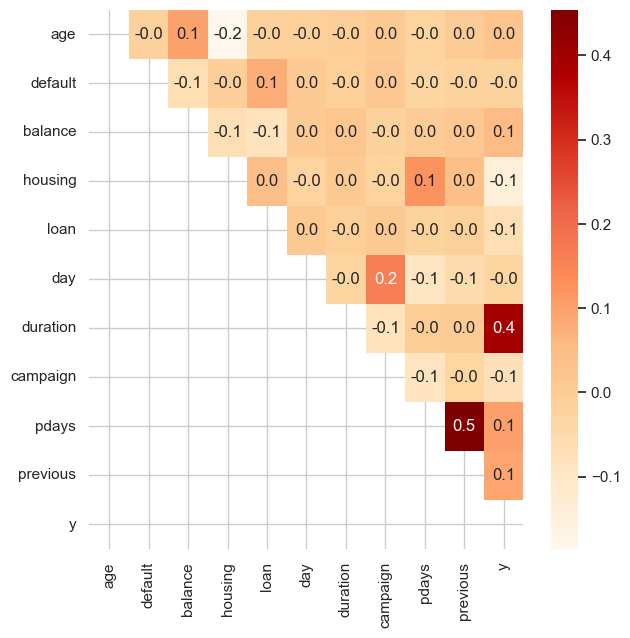

In [14]:
# correlation between numerical features
numerical = bank.select_dtypes(exclude='object')
num = numerical.columns
corr = numerical.corr()

#create and apply mask
mask = corr.where(np.triu(np.ones(corr.shape, dtype=bool), k=1))

#create heatmap
plt.figure(figsize=(7,7))
sns.heatmap(mask, cmap='OrRd', annot=True, fmt='.1f')

- The target variable (y) has the highest correlation with duration of call.
- There is a slight positive correlation between target and balance, the number of days since last contact, and the number of contacts performed before.
- There is a slight negative correlation between target and personal loan, housing loan, and number of campaign.
- There is a high correlation between the number of days since last contact and the number of contacts performed before this campaign. This is expected because most customers hasn't been contacted previously.
- There is a slight positive correlation between last contact day and number of campaign. 
- There is a slight positive correlation between the number of days since last contact and housing loan. Customers who have housing loan must have been in contact with the bank before.
- There is a slight positive correlation between age and balance. This makes sense because usually people would have higher savings over time.
- There is a slight negative correlation between age and loan. This makes sense because older people tend to have less personal loan because they already paid it and have less needs.

In [15]:
# Pairplot

#plt.figure(figsize = (15,15))
#sns.pairplot(bank2[num2], diag_kind='kde', kind='reg', hue='y', palette='Set2')

# Data Pre-processing

## Duplicates

In [16]:
bank.duplicated().sum()

0

## Outliers

In [17]:
from scipy import stats

In [18]:
print(f'Number of rows before dropping outliers: {len(bank)}')

Number of rows before dropping outliers: 45211


In [19]:
filtered_entries = np.array([True] * len(bank))

for col in num:
    zscore = abs(stats.zscore(numerical[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
bank = bank[filtered_entries]

print(f'Number of rows after dropping outliers: {len(bank)}')

Number of rows after dropping outliers: 39456


## Feature Encoding

In [20]:
# education, month -> label encoding
map_education = {'tertiary':3, 'secondary':2, 'unknown':0, 'primary':1}
map_month = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12}

bank['education'] = bank['education'].map(map_education)
bank['month'] = bank['month'].map(map_month)

bank.head()

age           job  marital  education  default  balance  housing  loan  \
0   58    management  married          3        0     2143        1     0   
1   44    technician   single          2        0       29        1     0   
2   33  entrepreneur  married          2        0        2        1     1   
3   47   blue-collar  married          0        0     1506        1     0   
4   33       unknown   single          0        0        1        0     0   

   contact  day  month  duration  campaign  pdays  previous poutcome  y  
0  unknown    5      5       261         1      0         0  unknown  0  
1  unknown    5      5       151         1      0         0  unknown  0  
2  unknown    5      5        76         1      0         0  unknown  0  
3  unknown    5      5        92         1      0         0  unknown  0  
4  unknown    5      5       198         1      0         0  unknown  0

In [21]:
# change poutcome=other to unknown
bank['poutcome'] = bank['poutcome'].replace('other', 'unknown')

In [22]:
# marital, job, contact, poutcome -> one-hot encoding

dummy_marital = pd.get_dummies(bank['marital'], prefix='marital', dtype=int)
dummy_job = pd.get_dummies(bank['job'], prefix='job', dtype=int)
dummy_contact = pd.get_dummies(bank['contact'], prefix='contact', dtype=int)
dummy_poutcome = pd.get_dummies(bank['poutcome'], prefix='outcome', dtype=int)
bank_encode = pd.concat([bank, dummy_marital, dummy_job, dummy_contact, dummy_poutcome],axis=1)

bank_encode.drop(['marital', 'job', 'contact', 'poutcome'], axis=1, inplace=True)

bank_encode.head()

age  education  default  balance  housing  loan  day  month  duration  \
0   58          3        0     2143        1     0    5      5       261   
1   44          2        0       29        1     0    5      5       151   
2   33          2        0        2        1     1    5      5        76   
3   47          0        0     1506        1     0    5      5        92   
4   33          0        0        1        0     0    5      5       198   

   campaign  ...  job_student  job_technician  job_unemployed  job_unknown  \
0         1  ...            0               0               0            0   
1         1  ...            0               1               0            0   
2         1  ...            0               0               0            0   
3         1  ...            0               0               0            0   
4         1  ...            0               0               0            1   

   contact_cellular  contact_telephone  contact_unknown  outcome_failure  \
0                 0                  0                1                0   
1                 0                  0                1                0   
2                 0                  0                1                0   
3                 0                  0                1                0   
4                 0                  0                1                0   

   outcome_success  outcome_unknown  
0                0                1  
1                0                1  
2                0                1  
3                0                1  
4                0                1  

[5 rows x 34 columns]

## Class Imbalance
Karena kelas minoritas ('yes') dari target = 11.7% > 10%, jadi kita tidak perlu handling imbalance

## Feature Selection

In [23]:
# check correlation score again
from IPython.display import display

pd.set_option('display.max_columns', None)

numerical = bank_encode.select_dtypes(exclude='object')
corr = numerical.corr()
corr

age  education  default   balance   housing      loan  \
age                1.000000  -0.166601      NaN  0.093831 -0.159423  0.002481   
education         -0.166601   1.000000      NaN  0.034085 -0.042940  0.003682   
default                 NaN        NaN      NaN       NaN       NaN       NaN   
balance            0.093831   0.034085      NaN  1.000000 -0.057852 -0.096320   
housing           -0.159423  -0.042940      NaN -0.057852  1.000000  0.042250   
loan               0.002481   0.003682      NaN -0.096320  0.042250  1.000000   
day               -0.010343   0.021240      NaN  0.011308 -0.015128  0.008267   
month              0.091251   0.065878      NaN  0.104017 -0.165486  0.025134   
duration          -0.024431  -0.004461      NaN  0.032213  0.012232 -0.012214   
campaign           0.035379   0.003758      NaN -0.016608 -0.040635 -0.003114   
pdays             -0.010025   0.025357      NaN  0.037704  0.083513 -0.007826   
previous           0.008714   0.048210      NaN  0.052722  0.014956 -0.016703   
y                 -0.008331   0.061253      NaN  0.066368 -0.146502 -0.069567   
marital_divorced   0.162988   0.007580      NaN -0.029664  0.001452  0.015681   
marital_married    0.295062  -0.128843      NaN  0.028788  0.027703  0.040802   
marital_single    -0.435749   0.134710      NaN -0.010363 -0.031138 -0.055418   
job_admin.        -0.050998  -0.025511      NaN -0.025949  0.040954  0.031867   
job_blue-collar   -0.025740  -0.355651      NaN -0.036188  0.171070  0.014428   
job_entrepreneur   0.026122   0.041673      NaN -0.003500  0.012521  0.037607   
job_housemaid      0.094295  -0.109618      NaN -0.002946 -0.080967 -0.020432   
job_management    -0.017880   0.448532      NaN  0.058871 -0.064374 -0.038842   
job_retired        0.381264  -0.089824      NaN  0.039140 -0.130317  0.000992   
job_self-employed -0.005366   0.080549      NaN  0.014265 -0.028654 -0.009289   
job_services      -0.057727  -0.069546      NaN -0.035419  0.067005  0.035527   
job_student       -0.207681  -0.044219      NaN  0.004623 -0.091042 -0.060580   
job_technician    -0.057347   0.062953      NaN -0.012945 -0.014994  0.013800   
job_unemployed     0.004931  -0.017311      NaN  0.017547 -0.051455 -0.037756   
job_unknown        0.051838  -0.101358      NaN  0.015122 -0.075694 -0.031942   
contact_cellular  -0.058270   0.168111      NaN  0.023937 -0.180634  0.014090   
contact_telephone  0.120143  -0.063361      NaN  0.034159 -0.067417 -0.005648   
contact_unknown   -0.000406  -0.143369      NaN -0.042448  0.223192 -0.011844   
outcome_failure    0.003267   0.030766      NaN  0.049868  0.074606  0.005305   
outcome_success    0.008587   0.045940      NaN  0.038579 -0.091361 -0.049866   
outcome_unknown   -0.007458  -0.051503      NaN -0.064230 -0.016120  0.022119   

                        day     month  duration  campaign     pdays  previous  \
age               -0.010343  0.091251 -0.024431  0.035379 -0.010025  0.008714   
education          0.021240  0.065878 -0.004461  0.003758  0.025357  0.048210   
default                 NaN       NaN       NaN       NaN       NaN       NaN   
balance            0.011308  0.104017  0.032213 -0.016608  0.037704  0.052722   
housing           -0.015128 -0.165486  0.012232 -0.040635  0.083513  0.014956   
loan               0.008267  0.025134 -0.012214 -0.003114 -0.007826 -0.016703   
day                1.000000  0.092265 -0.024936  0.132728 -0.063431 -0.054066   
month              0.092265  1.000000 -0.022719  0.054664 -0.102786 -0.027867   
duration          -0.024936 -0.022719  1.000000 -0.076593  0.014090  0.018849   
campaign           0.132728  0.054664 -0.076593  1.000000 -0.088572 -0.064410   
pdays             -0.063431 -0.102786  0.014090 -0.088572  1.000000  0.718787   
previous          -0.054066 -0.027867  0.018849 -0.064410  0.718787  1.000000   
y                 -0.029431  0.016073  0.359945 -0.078479  0.113576  0.168490   
marital_divorced   0.002819  0.000353  0.003844 -0.011

<Axes: >

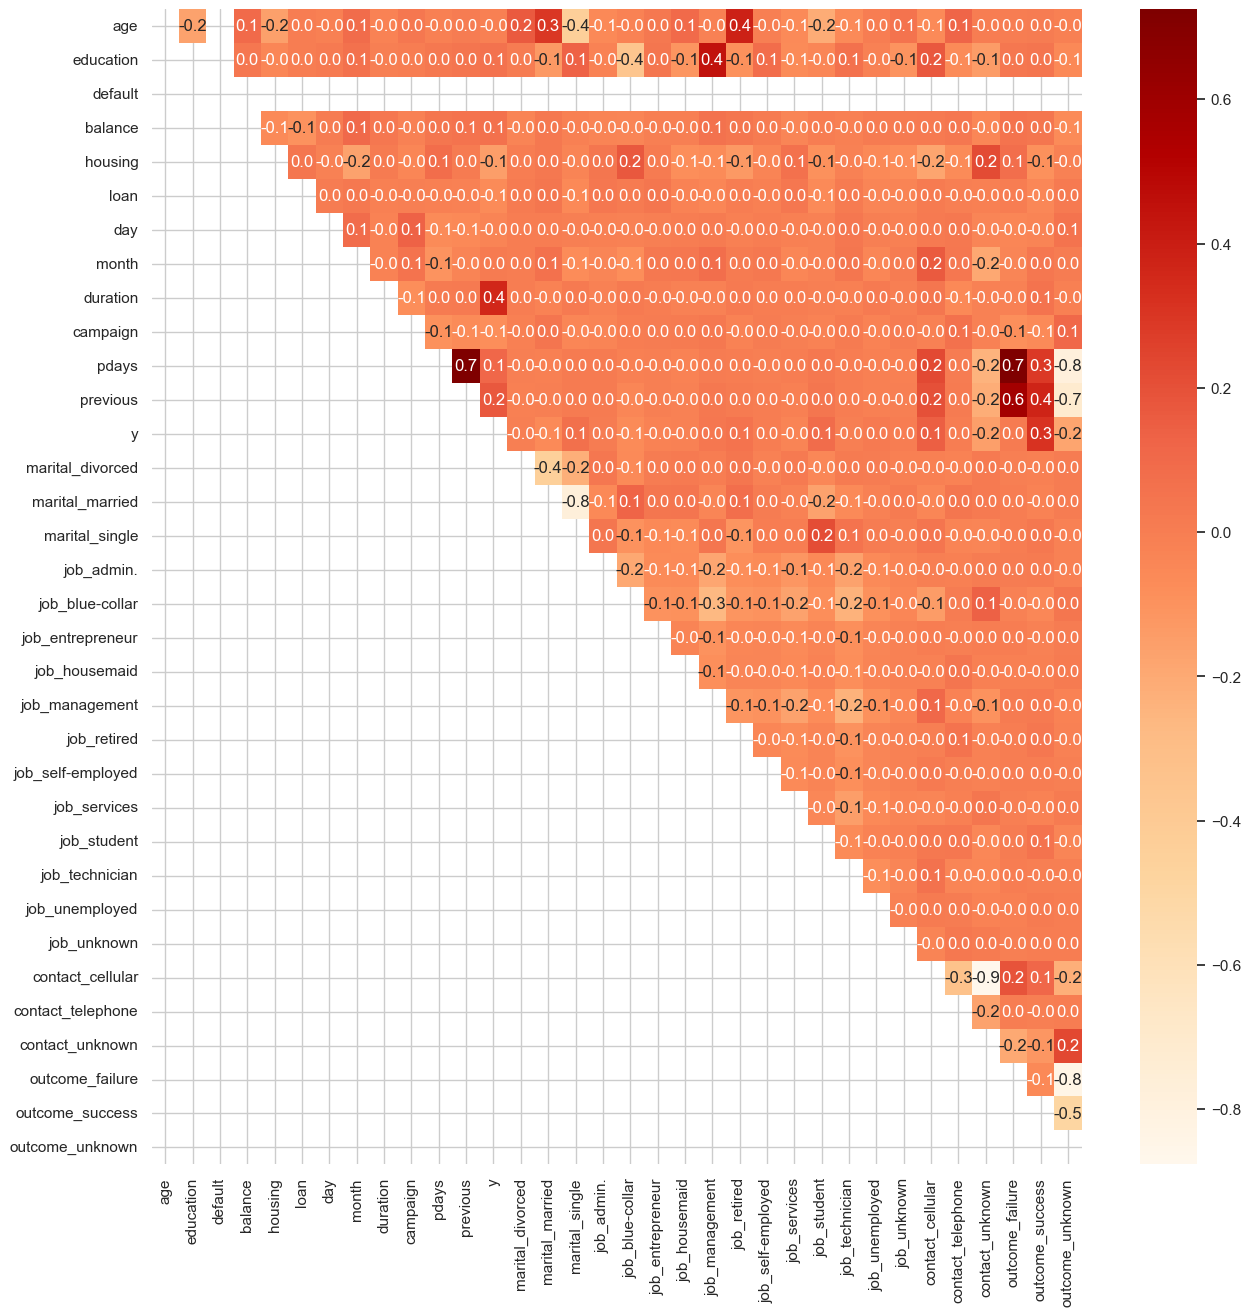

In [24]:
#create and apply mask
mask = corr.where(np.triu(np.ones(corr.shape, dtype=bool), k=1))

#create heatmap
plt.figure(figsize=(15,15))
sns.heatmap(mask, cmap='OrRd', annot=True, fmt='.1f')

- Among all jobs, student (0.089) have the highest correlation with target, followed by blue collar (-0.067), retired (0.053), management (0.034), services (-0.028), unemployed (0.022), enterpreneur (-0.020), and housemaid (-0.013).
- Education have positive correlation with target (0.06), it means higher education lead to higher chance to open deposit.
- Marriage seems to have negligible effect on target, with single (0.069) being slightly higher than married (0.061).
- Unknown means of communication (-0.15) have higher correlation with target than cellular (0.14). We could not interpret unknown data so we could only derive that cellular is better than telephone.
- Successful previous campaign outcome (0.31) contributes to target.

- Feature selection: Drop age, day, default, marital_divorced, job_unknown, self-employed, job_technician, job_admin., contact_telephone because Pearson's correlation with target is below 0.01

In [25]:
bank_sample = bank_encode.drop(['age','day','default','marital_divorced','job_unknown','job_self-employed', 'job_technician', 'job_admin.','contact_telephone'], axis=1)
bank_sample.head()

education  balance  housing  loan  month  duration  campaign  pdays  \
0          3     2143        1     0      5       261         1      0   
1          2       29        1     0      5       151         1      0   
2          2        2        1     1      5        76         1      0   
3          0     1506        1     0      5        92         1      0   
4          0        1        0     0      5       198         1      0   

   previous  y  marital_married  marital_single  job_blue-collar  \
0         0  0                1               0                0   
1         0  0                0               1                0   
2         0  0                1               0                0   
3         0  0                1               0                1   
4         0  0                0               1                0   

   job_entrepreneur  job_housemaid  job_management  job_retired  job_services  \
0                 0              0               1            0             0   
1                 0              0               0            0             0   
2                 1              0               0            0             0   
3                 0              0               0            0             0   
4                 0              0               0            0             0   

   job_student  job_unemployed  contact_cellular  contact_unknown  \
0            0               0                 0                1   
1            0               0                 0                1   
2            0               0                 0                1   
3            0               0                 0                1   
4            0               0                 0                1   

   outcome_failure  outcome_success  outcome_unknown  
0                0                0                1  
1                0                0                1  
2                0                0                1  
3                0                0                1  
4                0                0                1

# Training

## Normalization

In [26]:
# Import library
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()

feature = ['balance','month','duration']

bank_norm = bank_sample.copy()
bank_norm[feature] = scaler.fit_transform(bank_sample[feature])

bank_norm.head()

education   balance  housing  loan     month  duration  campaign  pdays  \
0          3  0.599361        1     0 -0.469748  0.132177         1      0   
1          2 -0.623825        1     0 -0.469748 -0.445454         1      0   
2          2 -0.639448        1     1 -0.469748 -0.839293         1      0   
3          0  0.230785        1     0 -0.469748 -0.755274         1      0   
4          0 -0.640026        0     0 -0.469748 -0.198648         1      0   

   previous  y  marital_married  marital_single  job_blue-collar  \
0         0  0                1               0                0   
1         0  0                0               1                0   
2         0  0                1               0                0   
3         0  0                1               0                1   
4         0  0                0               1                0   

   job_entrepreneur  job_housemaid  job_management  job_retired  job_services  \
0                 0              0               1            0             0   
1                 0              0               0            0             0   
2                 1              0               0            0             0   
3                 0              0               0            0             0   
4                 0              0               0            0             0   

   job_student  job_unemployed  contact_cellular  contact_unknown  \
0            0               0                 0                1   
1            0               0                 0                1   
2            0               0                 0                1   
3            0               0                 0                1   
4            0               0                 0                1   

   outcome_failure  outcome_success  outcome_unknown  
0                0                0                1  
1                0                0                1  
2                0                0                1  
3                0                0                1  
4                0                0                1

In [27]:
X = bank_norm.drop('y', axis=1)
y = bank_norm['y']

In [28]:
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [29]:
from sklearn.neural_network import MLPClassifier

In [30]:
clf = MLPClassifier(hidden_layer_sizes=(15,10,5), activation='relu', solver='adam', alpha=0.0005, random_state=20, max_iter=300)

In [31]:
clf.fit(X_train, y_train)

MLPClassifier(alpha=0.0005, hidden_layer_sizes=(15, 10, 5), max_iter=300,
              random_state=20)

In [32]:
train_predicted = clf.predict(X_train)
train_predicted

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print(f"Classification report for data train with {clf}:\n"
      f"{metrics.classification_report(y_train, train_predicted)}\n")

Classification report for data train with MLPClassifier(alpha=0.0005, hidden_layer_sizes=(15, 10, 5), max_iter=300,
              random_state=20):
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     28362
           1       0.65      0.41      0.50      3202

    accuracy                           0.92     31564
   macro avg       0.80      0.69      0.73     31564
weighted avg       0.91      0.92      0.91     31564




In [34]:
y_pred_proba_train = clf.predict_proba(X_train)
print("roc_auc training data: %.4f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

roc_auc training data: 0.9233


# Testing

In [35]:
y_predicted = clf.predict(X_test)
y_predicted

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

Evaluation metrics:
- Accuracy
- AUC (because the target class is almost imbalance)

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay

Confusion matrix:
[[6905  181]
 [ 533  273]]


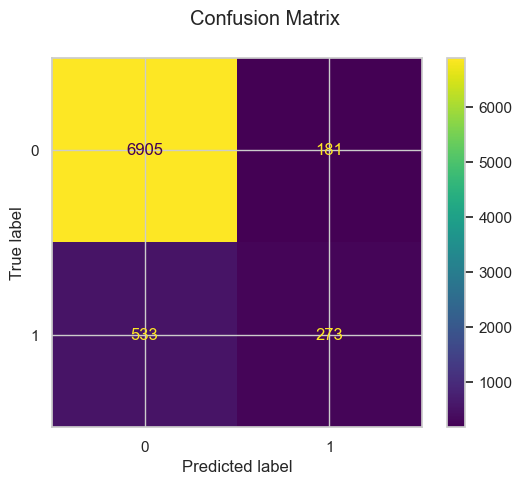

In [37]:
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [38]:
print(f"Classification report for data test with {clf}:\n"
      f"{metrics.classification_report(y_test, y_predicted)}\n")

Classification report for data test with MLPClassifier(alpha=0.0005, hidden_layer_sizes=(15, 10, 5), max_iter=300,
              random_state=20):
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7086
           1       0.60      0.34      0.43       806

    accuracy                           0.91      7892
   macro avg       0.76      0.66      0.69      7892
weighted avg       0.89      0.91      0.90      7892




In [39]:
y_pred_proba = clf.predict_proba(X_test)
print('roc_auc testing data: {:.4f}'.format(roc_auc_score(y_test, y_pred_proba[:, 1])))

roc_auc testing data: 0.9092


Accuracy and AUC of data train and data test is similar, so the model fits.

*No hyperparameter tuning due to time constraint, and the score is already >=90%

### Visualization of Multilayer Perceptron model

In [57]:
pip install palettable


     ---------------------------------------- 0.0/332.3 kB ? eta -:--:--
     ---------------------------------------- 0.0/332.3 kB ? eta -:--:--
     ---------------------------------------- 0.0/332.3 kB ? eta -:--:--
     ---------------------------------------- 0.0/332.3 kB ? eta -:--:--
     - -------------------------------------- 10.2/332.3 kB ? eta -:--:--
     - -------------------------------------- 10.2/332.3 kB ? eta -:--:--
     - -------------------------------------- 10.2/332.3 kB ? eta -:--:--
     --- --------------------------------- 30.7/332.3 kB 145.2 kB/s eta 0:00:03
     --- --------------------------------- 30.7/332.3 kB 145.2 kB/s eta 0:00:03
     --- --------------------------------- 30.7/332.3 kB 145.2 kB/s eta 0:00:03
     ---- -------------------------------- 41.0/332.3 kB 103.4 kB/s eta 0:00:03
     ---- -------------------------------- 41.0/332.3 kB 103.4 kB/s eta 0:00:03
     ---- -------------------------------- 41.0/332.3 kB 103.4 kB/s eta 0:00:03
     

In [94]:
import VisualizeNN as VisNN

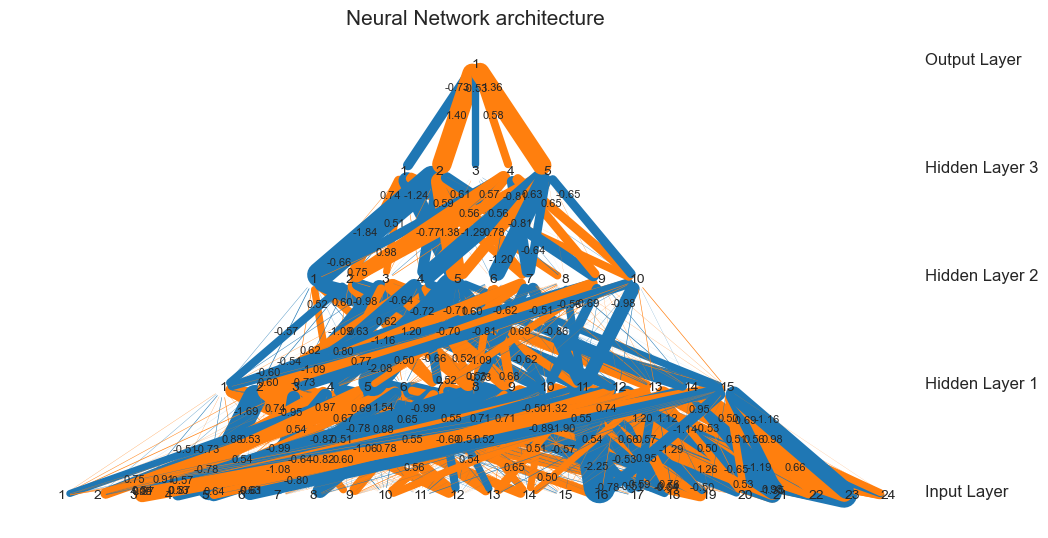

In [218]:
training_set_outputs = np.array([y_train]).T

network_structure = np.hstack(([X_train.shape[1]], np.asarray(clf.hidden_layer_sizes), training_set_outputs.shape[1]))

# Draw the Neural Network with weights
network=VisNN.DrawNN(network_structure, clf.coefs_)
network.draw()

In [180]:
X.columns

Index(['education', 'balance', 'housing', 'loan', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'marital_married', 'marital_single',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_services', 'job_student',
       'job_unemployed', 'contact_cellular', 'contact_unknown',
       'outcome_failure', 'outcome_success', 'outcome_unknown'],
      dtype='object')

In [219]:
pip install lime

     ---------------------------------------- 0.0/275.7 kB ? eta -:--:--
     - -------------------------------------- 10.2/275.7 kB ? eta -:--:--
     ----- ------------------------------- 41.0/275.7 kB 487.6 kB/s eta 0:00:01
     -------------- --------------------- 112.6/275.7 kB 930.9 kB/s eta 0:00:01
     ----------------------- -------------- 174.1/275.7 kB 1.0 MB/s eta 0:00:01
     --------------------------------- ---- 245.8/275.7 kB 1.2 MB/s eta 0:00:01
     -------------------------------------- 275.7/275.7 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283842 sha256=1481d9225b8fd429b0ac3f0fea145a01290623fa64baf73818c9a4cf298d7358
  Stored in directory: c:\users\athiy\appdata\local\pip\cache\wheels\fd\a2\af\9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime
Note: you may need to restart the kernel to use u

### Feature Importance

In [66]:
import lime
import lime.lime_tabular
from lime import lime_tabular
from __future__ import print_function
np.random.seed(1)

In [138]:
import warnings
warnings.filterwarnings("ignore")

In [67]:
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=[0, 1],
    mode='classification'
)

In [344]:
exp = explainer.explain_instance(
    data_row=X_test.iloc[8], 
    predict_fn=clf.predict_proba,
    num_features=15
)

exp.show_in_notebook(show_table=True)

In [345]:
exp = explainer.explain_instance(
    data_row=X_test.iloc[7710], 
    predict_fn=clf.predict_proba,
    num_features=15
)

exp.show_in_notebook(show_table=True)

In [346]:
exp = explainer.explain_instance(
    data_row=X_test.iloc[843], 
    predict_fn=clf.predict_proba,
    num_features=15
)

exp.show_in_notebook(show_table=True)

### Interpretation

Although feature importance could not be derived directly using Neural Network algorithm, at best I could guess the contribution of each feature on the decision of the model 'locally' based on the prediction probabilities. Prediction probabilities take one data point and compute the probability of top features to affect the outcome (target).

According to data #7710, the successful outcome of previous campaign, the length of duration, lack of housing loan, and number of campaign increase the customer’s chance to be classified as 'will subscribe'. Similarly, data #843 shows that duration, zero housing, and campaign contributes positiviely to customer's decision. Zero personal loan also contributes positively. In data #8, balance plays a factor in customer's decision, whereas oddly, the increase in number of campaign decreases the probability of 'will subscribe'. I could not make an inference on month because all data points are different. Job's effect is questionable because there is no job value=1 in all data points.

*Currently there is no way to see which row (data point) results in target=1, so I tried to input different values of iloc one-by-one.

# Conclusion and Recommendation

- A predictor with accuracy=91% and AUC=90% was achieved using Neural Network algorithm. Further recommendation for better predictor include:
   * Use SMOTE to balance data before splitting train & test data 
  * Tune the hyperparameters (hidden_layer_sizes, activation, solver, alpha, learning rate) of MLPClassifier using GridSearch to find better accuracy and AUC
  * Tune the hyperparameters of MLPClassifier using keras package and BayesianOptimization to see the optimal hyperparameters
  * Consider using other algorithms such as Logistic Regression, kNN, Decision Tree, Random Forest
- Duration is the most important feature that affect customer's decision to open deposit account. Therefore, increase duration of call to customers, but limit the number of calls to 2 because it's the optimum value.
- Focus on customers with zero loans.
- Pursue leads with higher balance.
- Hypothesis testing could be carried out to determine whether the difference in job and education affect customer's decision.
- Further analysis on the effect of month needs to be carried out. Is it a seasonal trend? What happened in those months?
- The bank needs to improve its record keeping and follow up campaigns diligently. 
- Future action could include the creation of customer profile. Customers can be clustered based on their balance, job, and education. Each cluster could be targeted with different product and marketing approach.